<h1 style=”font-size:4rem;color:blue;text-align:center;”>Notebook 5</h1>


##### Libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

#### Data

In [3]:
df = pd.read_csv("combined_data.csv")

In [5]:
df.head()

,Date,Mean-value,Interest-rate,Month,Year,Quarter,Week-of-year,Week-of-month,Day-of-week,Day-of-year,election-year
0,10/11/2016,101.28,0.69,10.0,2016.0,4.0,42.0,3.0,2.0,285.0,0
1,10/13/2016,101.30,0.66,10.0,2016.0,4.0,42.0,3.0,4.0,287.0,0
2,10/13/2016,101.30,0.66,10.0,2016.0,4.0,42.0,3.0,4.0,287.0,0
3,10/13/2016,101.30,0.66,10.0,2016.0,4.0,42.0,3.0,4.0,287.0,0
4,10/13/2016,101.30,0.66,10.0,2016.0,4.0,42.0,3.0,4.0,287.0,0


In [19]:
df.tail(8)

,Date,Mean-value,Interest-rate,Month,Year,Quarter,Week-of-year,Week-of-month,Day-of-week,Day-of-year,election-year
2063,1/9/2025,128.485175,4.16,1.0,2025.0,1.0,2.0,2.0,4.0,9.0,0
2064,1/10/2025,128.494500,4.25,1.0,2025.0,1.0,2.0,2.0,5.0,10.0,0
2065,1/13/2025,128.755650,4.24,1.0,2025.0,1.0,3.0,3.0,1.0,13.0,0
2066,1/14/2025,128.427450,4.22,1.0,2025.0,1.0,3.0,3.0,2.0,14.0,0
2067,1/15/2025,128.292175,4.19,1.0,2025.0,1.0,3.0,3.0,3.0,15.0,0
2068,1/16/2025,128.584425,4.18,1.0,2025.0,1.0,3.0,3.0,4.0,16.0,0
2069,1/17/2025,128.500950,4.21,1.0,2025.0,1.0,3.0,3.0,5.0,17.0,0
2071,1/21/2025,128.174825,4.21,1.0,2025.0,1.0,4.0,4.0,2.0,21.0,0


In [17]:
df.isna().sum()

Date             0
Mean-value       0
Interest-rate    0
Month            0
Year             0
Quarter          0
Week-of-year     0
Week-of-month    0
Day-of-week      0
Day-of-year      0
election-year    0
dtype: int64

In [15]:
df = df.dropna()

In [27]:
df.shape

(2002, 11)

##### Load the data again to plot mean-value & Interest rate against Date

In [21]:
df2 = (pd.read_csv("combined_data.csv", index_col='Date', parse_dates=True)).dropna()

In [25]:
df2.shape

(2002, 10)

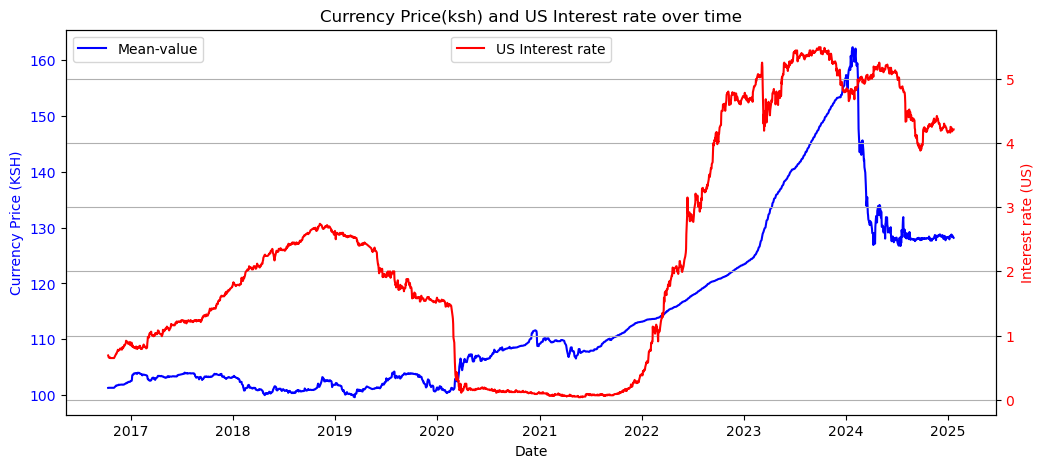

In [44]:
#Plotting

fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(df2.index, df2['Mean-value'], label='Mean-value', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Currency Price (KSH)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  # Create a twin axis sharing the same x-axis
ax2.plot(df2.index, df2['Interest-rate'], label='US Interest rate', color='red')
ax2.set_ylabel('Interest rate (US)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Currency Price(ksh) and US Interest rate over time')
plt.grid()

ax1.legend(loc='upper left')
ax2.legend(loc='upper center')

plt.show()

There is a notable correlation between the Currency price and Interest rate

#### Train Test Split

##### Random train test split

In [50]:
from sklearn.model_selection import train_test_split

In [54]:
X = df.drop(columns = ["Date", "Mean-value", "Year"], axis=1)
y = df["Mean-value"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1501, 8), (501, 8), (1501,), (501,))

#### Modelling

In [76]:
#models
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor

In [79]:
models = {
    "Ridge" : Ridge(alpha=1.0),
    "Lasso" : Lasso(alpha=1.0),
    "Random Forest" : RandomForestRegressor(),
    "KNeighbors" : KNeighborsRegressor(),
    "SVM" : SVR(kernel = 'rbf', C=1.0, epsilon=0.1),
    "XGBoost" : XGBRegressor(),
    "ElasticNet" : ElasticNet(alpha=0.1, l1_ratio=0.7),
    "Gradient Boost Regressor" : GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3),
    "AdaBoost" : AdaBoostRegressor(n_estimators=100, learning_rate=0.1),
    "lightgbm" : LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5),
    "Neural Networks" : MLPRegressor(hidden_layer_sizes=(1000), max_iter=500)
        
}

##### Random train test split modelling

In [81]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name}: {model.score(X_test, y_test)}")

Ridge: 0.5966469123813085
Lasso: 0.5633488940789405
Random Forest: 0.9433227737965214
KNeighbors: 0.6966253837741021
SVM: -0.10140397260351741
XGBoost: 0.9299431561880562
ElasticNet: 0.5743755929155548


C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.526e+04, tolerance: 3.389e+01
  model = cd_fast.enet_coordinate_descent(


Gradient Boost Regressor: 0.9383588801258665
AdaBoost: 0.8847345172453069
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 577
[LightGBM] [Info] Number of data points in the train set: 1501, number of used features: 8
[LightGBM] [Info] Start training from score 114.324549
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

#### 1.1 Random Forest

In [87]:
rf = RandomForestRegressor()

In [89]:
rf_model = rf.fit(X_train, y_train)

In [91]:
preds = rf_model.predict(X_test)

In [93]:
rf_model.score(X_test, y_test)

0.943510896232844

In [95]:
y_test

1441    118.66
365     100.86
1378    115.54
936     107.88
1333    113.64
         ...  
1401    116.69
421     100.96
1669    140.44
718     103.82
1704    143.91
Name: Mean-value, Length: 501, dtype: float64

In [97]:
actual = pd.DataFrame(y_test)

In [101]:
actual['preds'] = preds

In [103]:
actual

,Mean-value,preds
1441,118.66,118.6678
365,100.86,101.1339
1378,115.54,115.5619
936,107.88,107.5396
1333,113.64,113.6409
...,...,...
1401,116.69,116.5450
421,100.96,101.0511
1669,140.44,140.4329
718,103.82,103.8374


In [107]:
actuals = actual.reset_index()

In [109]:
actuals

,index,Mean-value,preds
0,1441,118.66,118.6678
1,365,100.86,101.1339
2,1378,115.54,115.5619
3,936,107.88,107.5396
4,1333,113.64,113.6409
...,...,...,...
496,1401,116.69,116.5450
497,421,100.96,101.0511
498,1669,140.44,140.4329
499,718,103.82,103.8374


<Axes: >

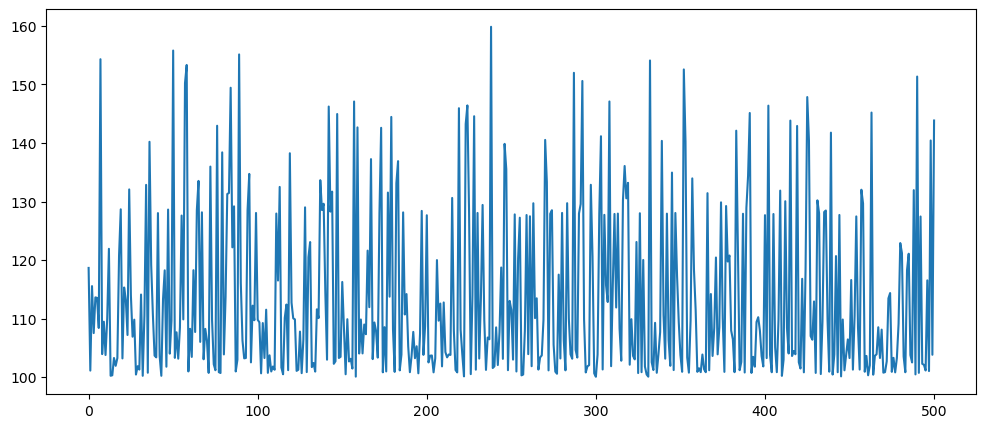

In [111]:
actuals['preds'].plot(figsize=(12,5))

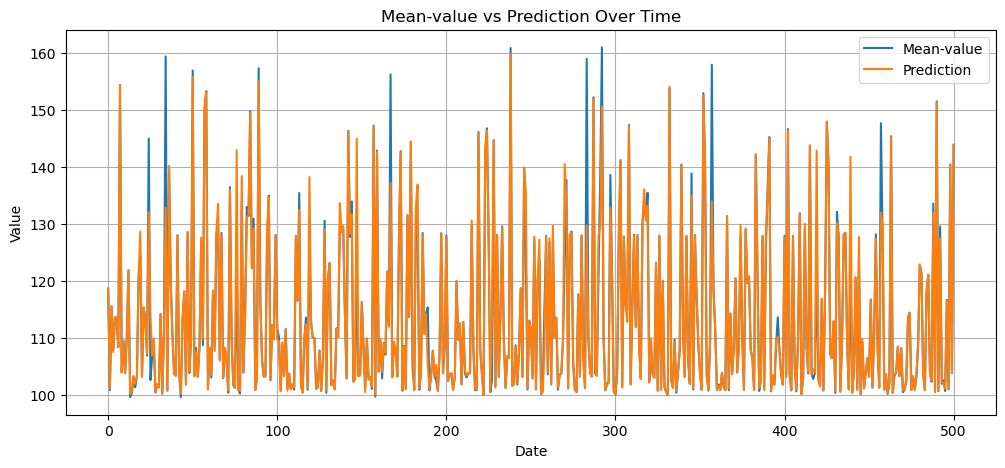

In [113]:
plt.figure(figsize=(12, 5))
plt.plot(actuals.index, actuals['Mean-value'], label='Mean-value')
plt.plot(actuals.index, actuals['preds'], label='Prediction')

# Add labels, title, and legend

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Mean-value vs Prediction Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

#### merging the data

In [154]:
df_merged2 = pd.merge(df, actual, left_index=True, right_index=True)

In [140]:
df_merged2

,Date,Mean-value_x,Interest-rate,Month,Year,Quarter,Week-of-year,Week-of-month,Day-of-week,Day-of-year,election-year,Mean-value_y,preds
2,10/13/2016,101.30000,0.66,10.0,2016.0,4.0,42.0,3.0,4.0,287.0,0,101.30000,101.300000
24,11/23/2016,101.85000,0.80,11.0,2016.0,4.0,48.0,4.0,3.0,328.0,0,101.85000,101.853100
32,12/1/2016,101.85000,0.82,12.0,2016.0,4.0,49.0,1.0,4.0,336.0,0,101.85000,101.881900
33,12/2/2016,101.86000,0.80,12.0,2016.0,4.0,49.0,1.0,5.0,337.0,0,101.86000,101.885200
35,12/6/2016,101.87000,0.83,12.0,2016.0,4.0,50.0,2.0,2.0,341.0,0,101.87000,101.881900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,12/16/2024,127.96115,4.24,12.0,2024.0,4.0,51.0,3.0,1.0,351.0,0,127.96115,128.217723
2051,12/23/2024,127.73115,4.26,12.0,2024.0,4.0,52.0,4.0,1.0,358.0,0,127.73115,128.284586
2058,1/2/2025,128.22750,4.17,1.0,2025.0,1.0,1.0,1.0,4.0,2.0,0,128.22750,128.535786
2061,1/7/2025,128.41735,4.19,1.0,2025.0,1.0,2.0,2.0,2.0,7.0,0,128.41735,128.153679


In [142]:
df_merged2_index = df_merged2.set_index('Date')

In [144]:
df_merged2

,Mean-value_x,Interest-rate,Month,Year,Quarter,Week-of-year,Week-of-month,Day-of-week,Day-of-year,election-year,Mean-value_y,preds
Date,,,,,,,,,,,,
10/13/2016,101.30000,0.66,10.0,2016.0,4.0,42.0,3.0,4.0,287.0,0,101.30000,101.300000
11/23/2016,101.85000,0.80,11.0,2016.0,4.0,48.0,4.0,3.0,328.0,0,101.85000,101.853100
12/1/2016,101.85000,0.82,12.0,2016.0,4.0,49.0,1.0,4.0,336.0,0,101.85000,101.881900
12/2/2016,101.86000,0.80,12.0,2016.0,4.0,49.0,1.0,5.0,337.0,0,101.86000,101.885200
12/6/2016,101.87000,0.83,12.0,2016.0,4.0,50.0,2.0,2.0,341.0,0,101.87000,101.881900
...,...,...,...,...,...,...,...,...,...,...,...,...
12/16/2024,127.96115,4.24,12.0,2024.0,4.0,51.0,3.0,1.0,351.0,0,127.96115,128.217723
12/23/2024,127.73115,4.26,12.0,2024.0,4.0,52.0,4.0,1.0,358.0,0,127.73115,128.284586
1/2/2025,128.22750,4.17,1.0,2025.0,1.0,1.0,1.0,4.0,2.0,0,128.22750,128.535786


#### Plotting the Prediction values and the Actual values

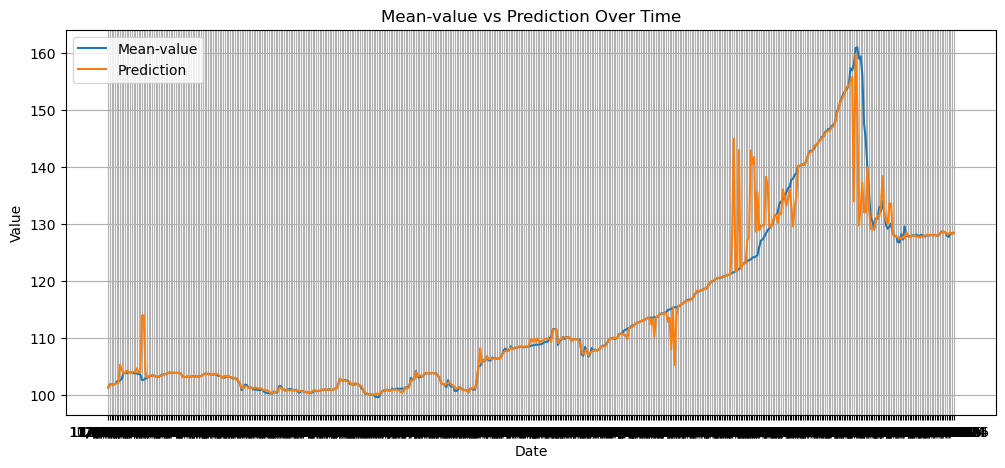

In [148]:
#Plot
plt.figure(figsize=(12, 5))
plt.plot(df_merged2_index.index, df_merged2_index['Mean-value_x'], label='Mean-value')
plt.plot(df_merged2_index.index, df_merged2_index['preds'], label='Prediction')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Mean-value vs Prediction Over Time')
plt.legend()
plt.grid(True)

plt.show()

In [158]:
df_merged2.to_csv("df_merged2.csv", index=False)

#### 2.1 LightGBM

In [169]:
lgbm = LGBMRegressor(n_estimators=100, learning_rate=1, max_depth=3)

In [171]:
lgbm_model = lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 577
[LightGBM] [Info] Number of data points in the train set: 1501, number of used features: 8
[LightGBM] [Info] Start training from score 114.324549
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [173]:
lgbm_model.score(X_test, y_test)

0.9492370416329292